In [57]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#import seaborn as sns
#sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Disply all Columns
pd.options.display.max_columns=70

In [59]:
churn = pd.read_csv('9mo_pull.csv')
churn.head()

,member_id,tier,country,source,tenure,active
0,12428284,Platinum,Germany,referral,6,0
1,39743027,Platinum,France,referral,1,0
2,59559187,Silver,UK,organic,1,0
3,46170183,Silver,UK,organic,4,0
4,14600427,Gold,France,organic,1,0


In [60]:
# Column names may be accessed (and changed) using the `.columns` attribute as below
print("Old Column Names:\n", churn.columns) 

Old Column Names:
 Index(['member_id', 'tier', 'country', 'source', 'tenure', 'active'], dtype='object')


In [61]:
!pip install pyjanitor 
import janitor
churn = churn.clean_names()
print("New Janitor Column Names:\n", churn.columns) 

New Janitor Column Names:
 Index(['member_id', 'tier', 'country', 'source', 'tenure', 'active'], dtype='object')


In [62]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_"
print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
churn.columns = [col.strip().replace(' ', '_').lower() for col in churn.columns]
churn.columns = [col.strip().replace('-', '_').lower() for col in churn.columns]
# Print edited column names
print("\nNew Column Names:\n", churn.columns)


Stripping spaces from ends of column names; replacing internal spaces with '_'


New Column Names:
 Index(['member_id', 'tier', 'country', 'source', 'tenure', 'active'], dtype='object')


In [63]:
churn.shape

(99944, 6)

In [64]:
churn.info() # no missing values # dtype of TV (active) is int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99944 entries, 0 to 99943
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   member_id  99944 non-null  int64 
 1   tier       99944 non-null  object
 2   country    99944 non-null  object
 3   source     99944 non-null  object
 4   tenure     99944 non-null  int64 
 5   active     99944 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.6+ MB


In [65]:
len(churn)

99944

In [66]:
churn.describe()

,member_id,tenure,active
count,9.994400e+04,99944.000000,99944.000000
mean,4.997105e+07,2.569229,0.074962
std,2.880743e+07,2.453557,0.263331
min,6.290000e+02,1.000000,0.000000
25%,2.498473e+07,1.000000,0.000000
50%,4.999141e+07,1.000000,0.000000
75%,7.476738e+07,3.000000,0.000000
max,9.999681e+07,9.000000,1.000000


In [67]:
churn.describe().transpose()  # change the rows and columns

,count,mean,std,min,25%,50%,75%,max
member_id,99944.0,4.997105e+07,2.880743e+07,629.0,24984731.0,49991408.5,74767375.5,99996814.0
tenure,99944.0,2.569229e+00,2.453557e+00,1.0,1.0,1.0,3.0,9.0
active,99944.0,7.496198e-02,2.633313e-01,0.0,0.0,0.0,0.0,1.0


In [68]:
# group by the 'label' and show descriptive stat
churn.groupby('tenure').agg(['count', 'mean','std','min','max','median']).T.head(20)

tenure                       1             2             3             4  \
member_id count   5.139000e+04  2.012100e+04  7.925000e+03  4.259000e+03   
          mean    4.993711e+07  4.990453e+07  5.042311e+07  4.931289e+07   
          std     2.876607e+07  2.883862e+07  2.894609e+07  2.898520e+07   
          min     5.280000e+03  6.290000e+02  1.359600e+04  6.465000e+03   
          max     9.999586e+07  9.999608e+07  9.999681e+07  9.997297e+07   
          median  5.014298e+07  4.972562e+07  5.038975e+07  4.897160e+07   
active    count   5.139000e+04  2.012100e+04  7.925000e+03  4.259000e+03   
          mean    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          std     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          max     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          median  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

tenure                       5             6             7             8  \
member_id count   2.721000e+03  1.813000e+03  1.359000e+03  2.864000e+03   
          mean    5.083230e+07  4.994418e+07  5.097563e+07  4.947698e+07   
          std     2.853407e+07  2.867407e+07  2.896375e+07  2.847754e+07   
          min     2.798000e+04  6.802200e+04  1.158110e+05  3.913000e+03   
          max     9.998528e+07  9.993412e+07  9.990481e+07  9.998493e+07   
          median  5.135545e+07  4.938503e+07  5.134466e+07  4.949844e+07   
active    count   2.721000e+03  1.813000e+03  1.359000e+03  2.864000e+03   
          mean    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          std     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          max     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          median  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

tenure                       9  
member_id count   7.492000e+03  
          mean    4.997885e+07  
          std     2.898367e+07  
          min     7.357000e+03  
          max     9.996468e+07  
          median  4.957687e+07  
active    count   7.492000e+03  
          mean    1.000000e+00  
          std     0.000000e+00  
          min     1.000000e+00  
          max     1.000000e+00  
          median  1.000000e+00

In [69]:
churn.describe(include=['object', 'bool'])

,tier,country,source
count,99944,99944,99944
unique,3,8,3
top,Gold,US,organic
freq,59838,18425,82836


In [70]:
churn['active'].value_counts()

0    92452
1     7492
Name: active, dtype: int64

In [71]:
churn['active'].value_counts(normalize=True) # Imbalanced data set

0    0.925038
1    0.074962
Name: active, dtype: float64

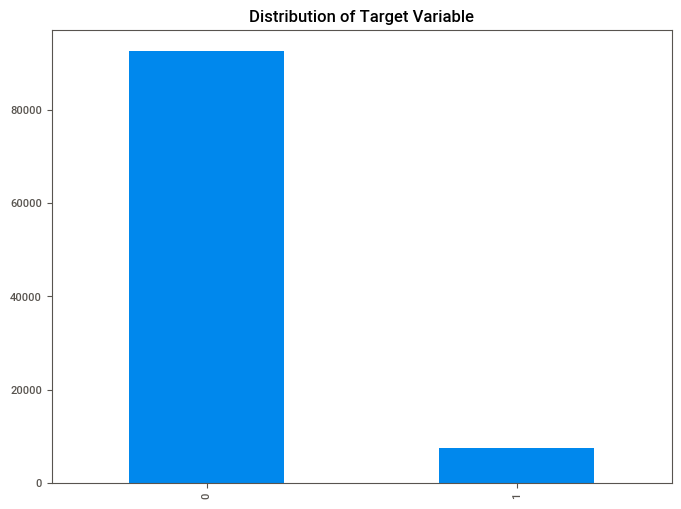

In [72]:
(churn['active'].value_counts().plot(
        kind='bar',
        figsize=(8, 6),
        title='Distribution of Target Variable',
    )
);
plt.show()       

In [73]:
# The target variable, active, is unbalanced - meaning the variable contains about 4x more "active"  instances than "churn"
#instances.This can present a problem since the positive class we want to predict is the "churn" class (1).

In [74]:
churn['active'].mean() #what is the proportion of churned users in our dataframe?

0.07496197870807653

In [75]:
churn[churn['active'] == 1].mean()

member_id    4.997885e+07
tenure       9.000000e+00
active       1.000000e+00
dtype: float64

In [76]:
churn.apply(np.max) 

member_id    99996814
tier           Silver
country            US
source       referral
tenure              9
active              1
dtype: object

In [77]:
# checking null value
churn.isnull().sum()

member_id    0
tier         0
country      0
source       0
tenure       0
active       0
dtype: int64

In [78]:
#numerical variables

num = list(churn.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(churn.select_dtypes(include='O').keys())

print(cat)

print(num)

['tier', 'country', 'source']
['member_id', 'tenure', 'active']


Visual data analysis in Python


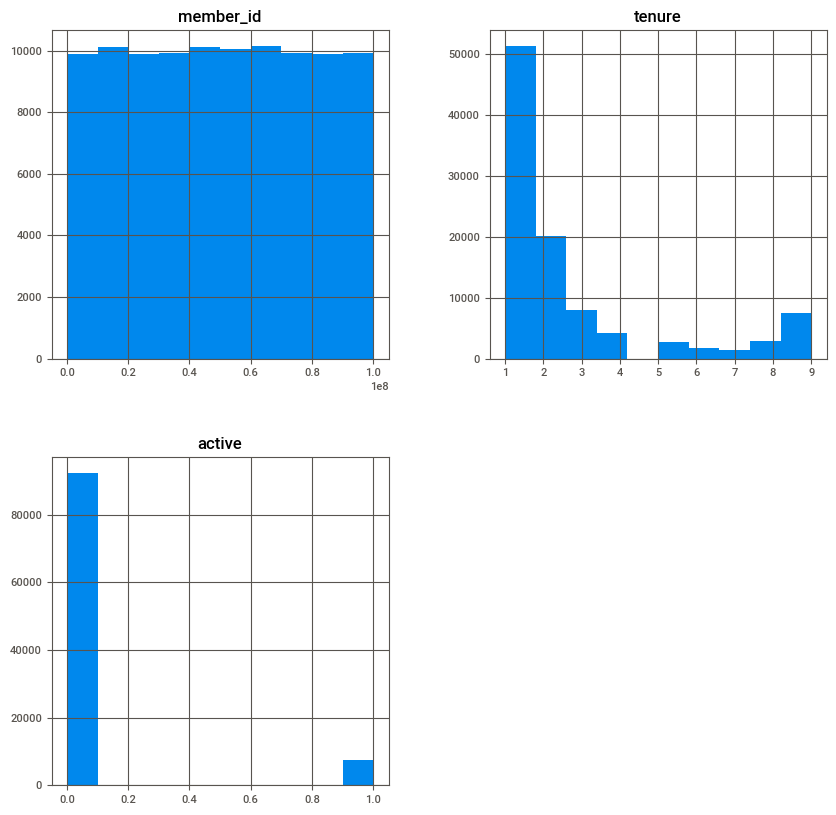

In [79]:
features = ['member_id', 'tenure', 'active']

churn[features].hist(figsize=(10, 10));

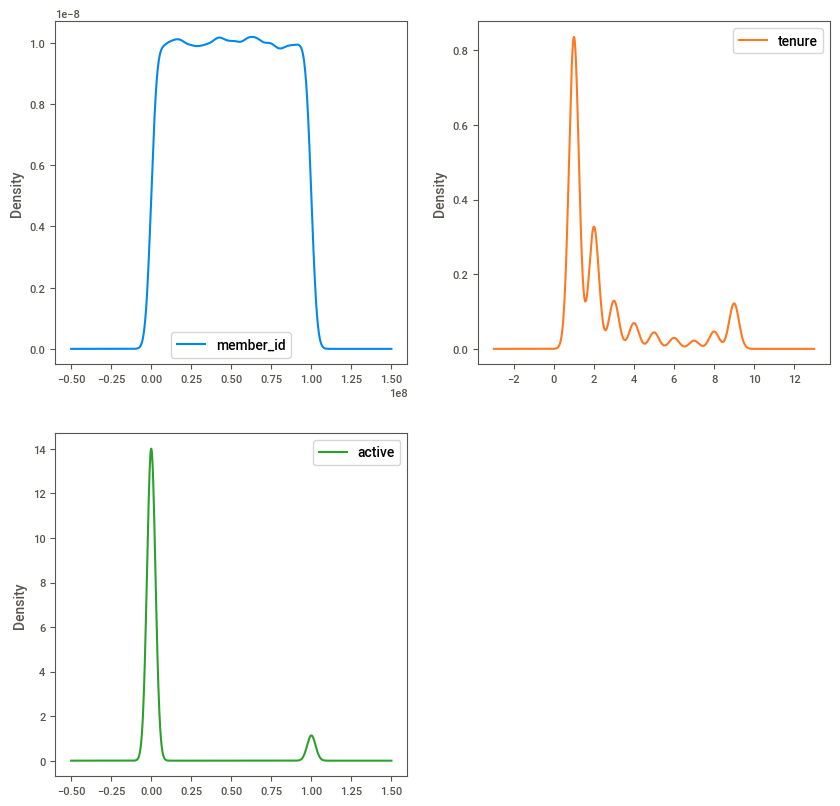

In [80]:
churn[features].plot(kind='density', subplots=True, layout=(2, 2), 
                  sharex=False, figsize=(10, 10));

In [81]:
import seaborn as sns

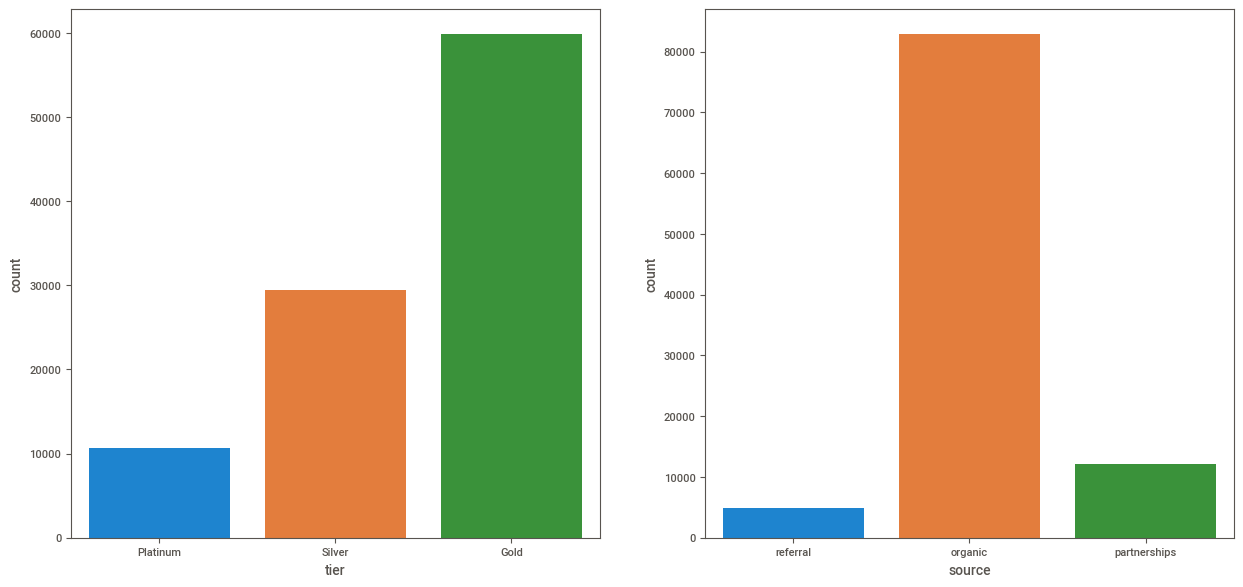

In [82]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.countplot(x='tier', data=churn, ax=axes[0]);
sns.countplot(x='source', data=churn, ax=axes[1]);

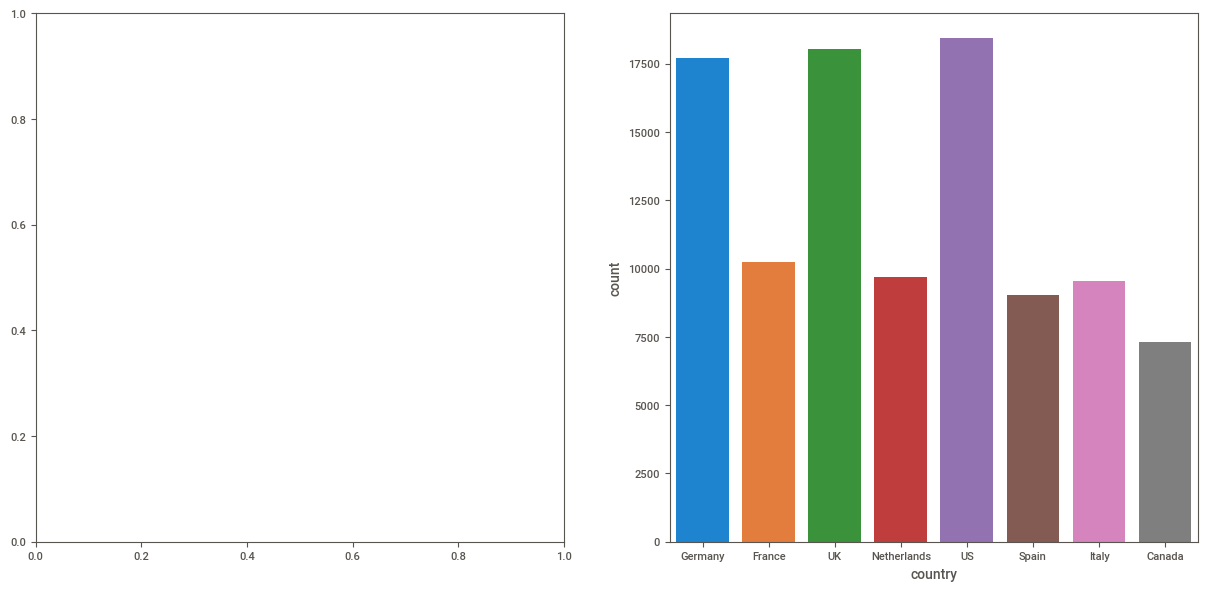

In [83]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.countplot(x='country', data=churn, ax=axes[1]);

In [84]:
# Calculate Correlation
corr_matrix = churn.corr()  # corr(autinsurance)
corr_matrix


,member_id,tenure,active
member_id,1.000000,0.000751,0.000077
tenure,0.000751,1.000000,0.746122
active,0.000077,0.746122,1.000000


<AxesSubplot:>

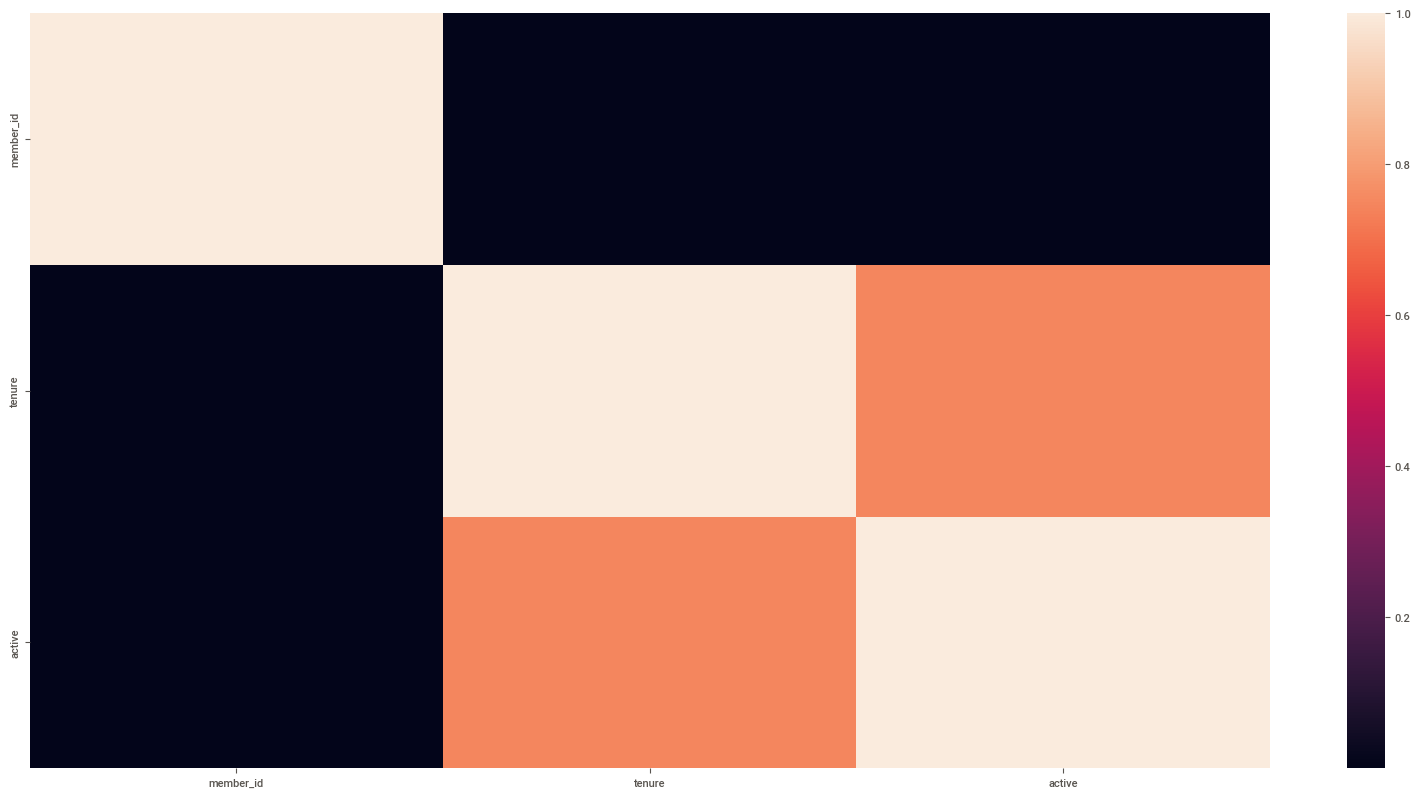

In [85]:
# 4.2 Correlation heatmap of the numberic variables
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(churn.corr())

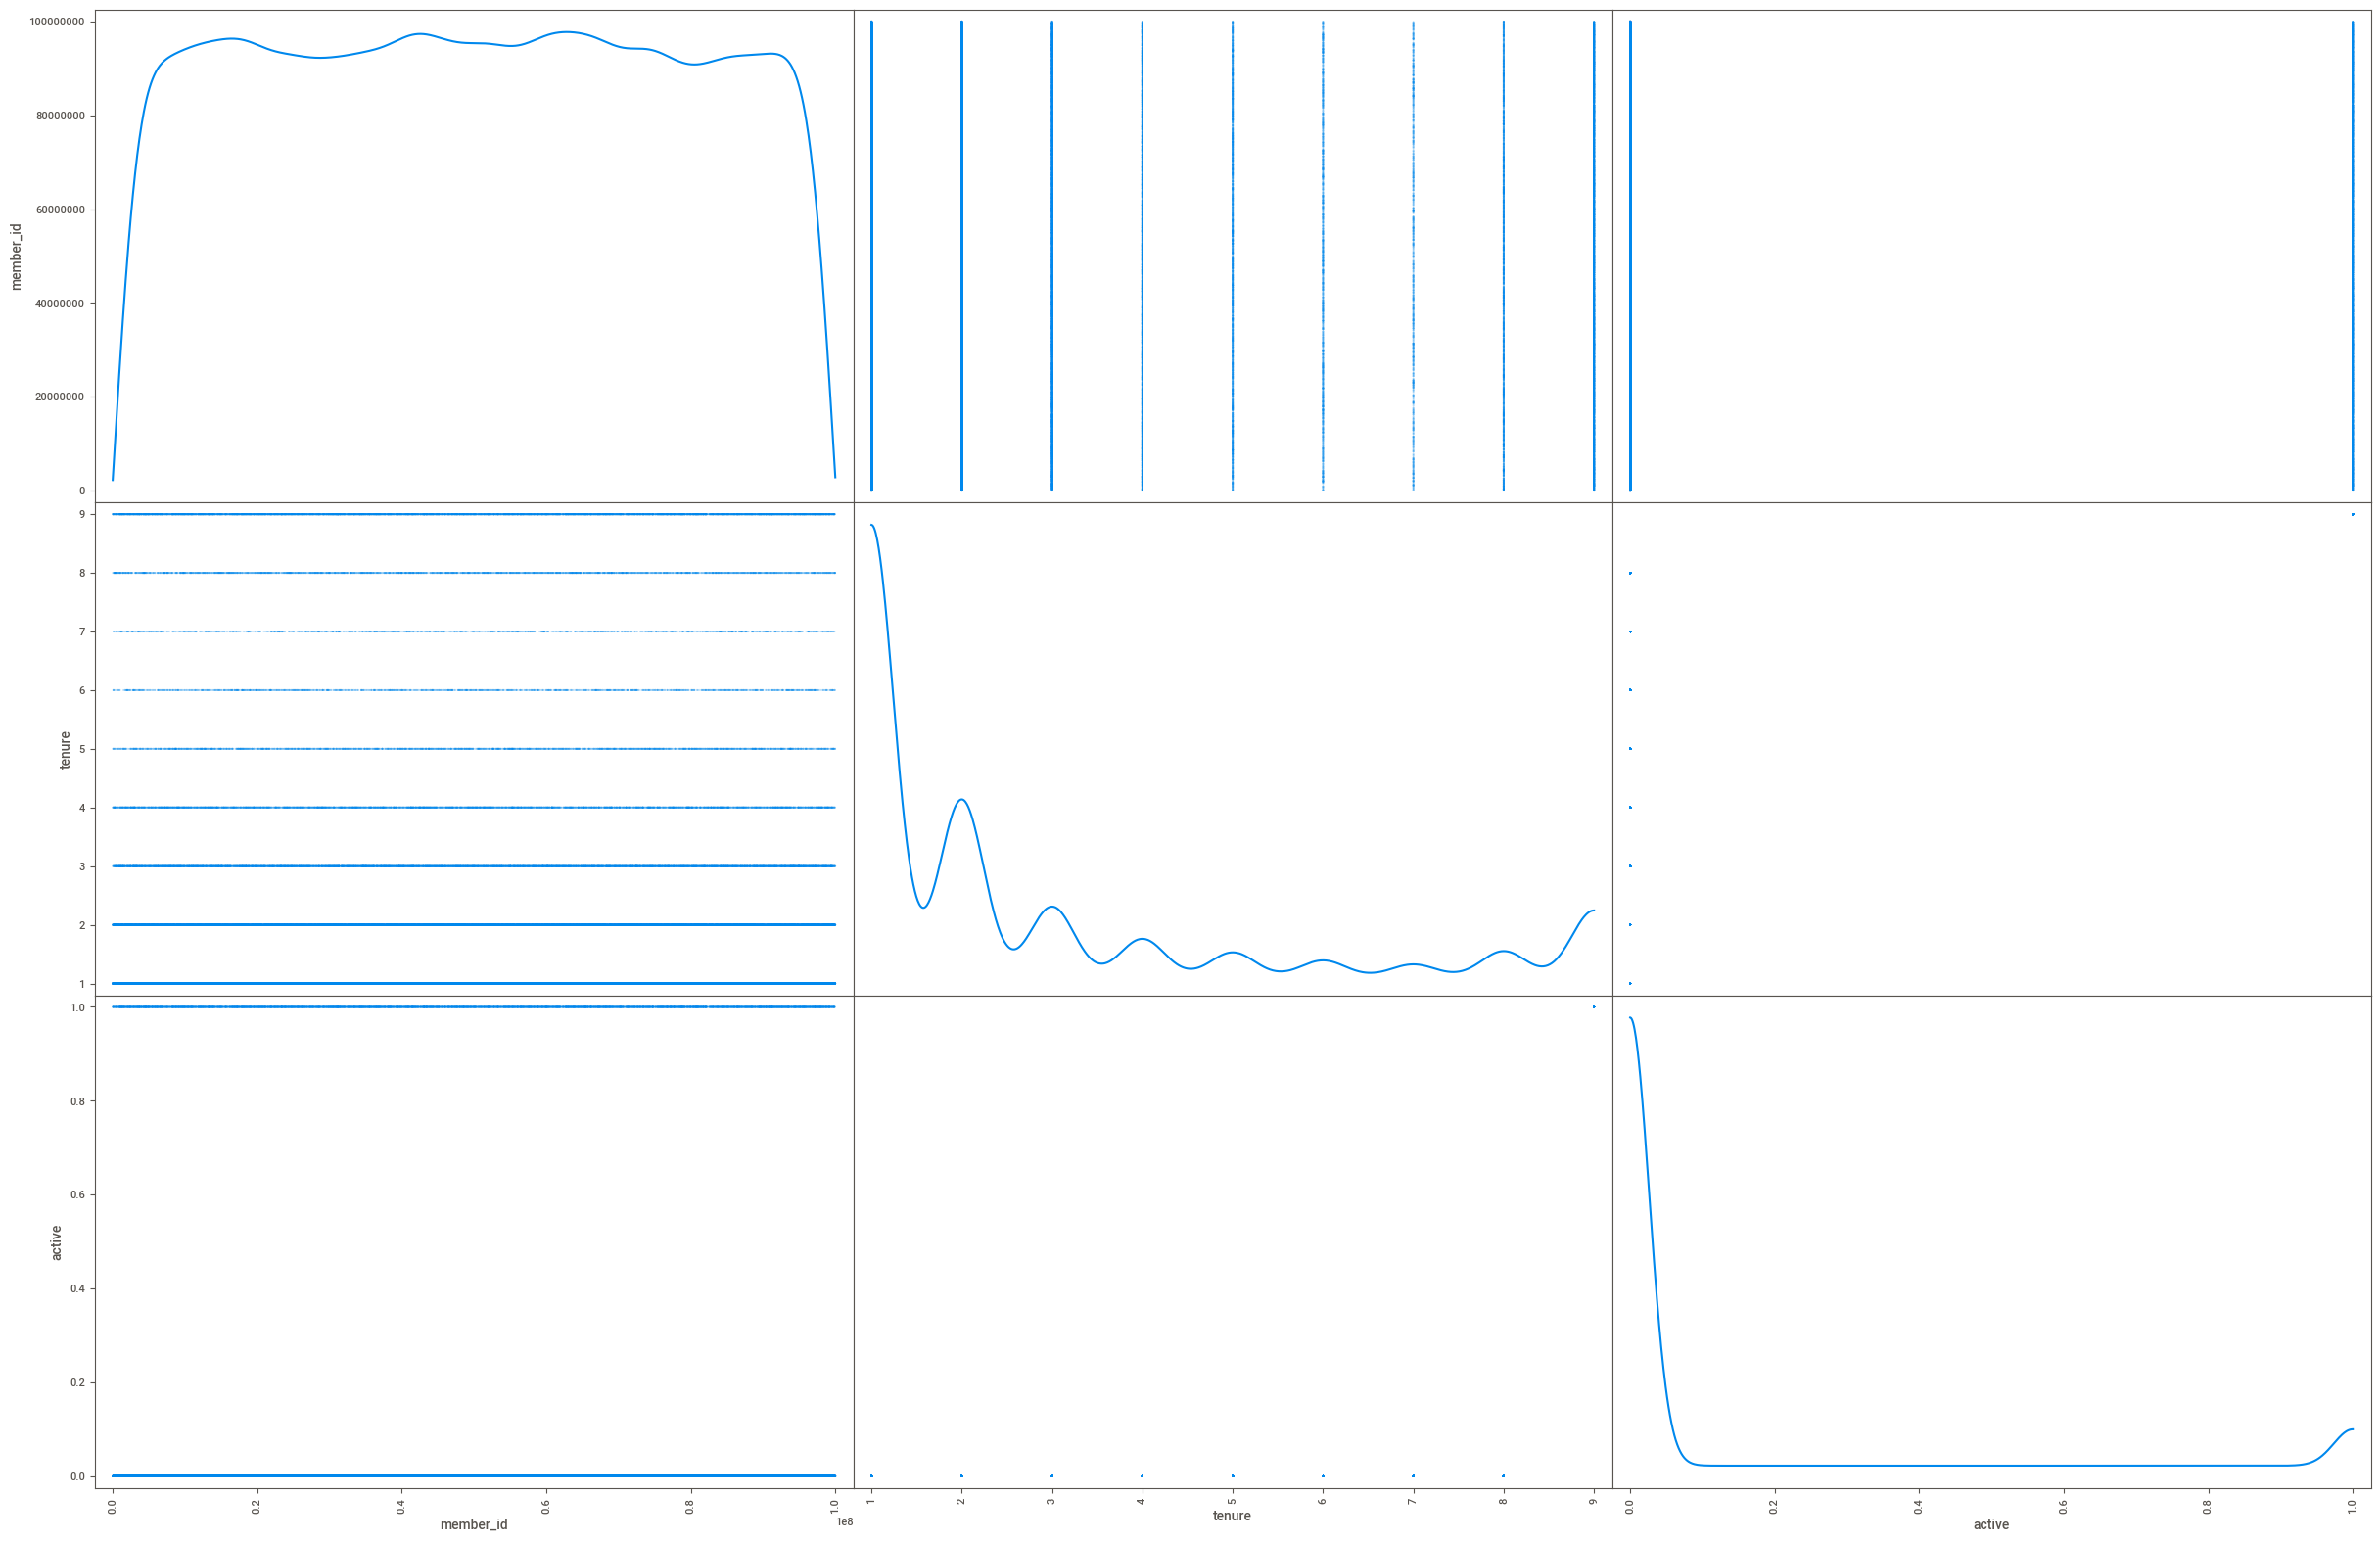

In [86]:
#Pandas scatter matrix function helps visualize the relationship between features

from pandas.plotting import scatter_matrix
p=scatter_matrix(churn, alpha=0.2, figsize=(30, 20), diagonal='kde')



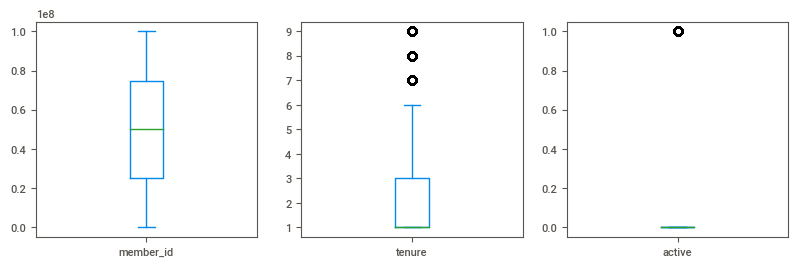

In [87]:
# Box and Whisker Plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,20  # control plot size
churn.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()


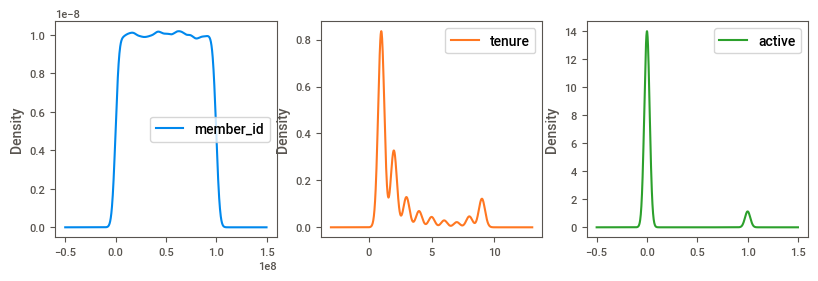

In [88]:
# Univariate Density Plots
plt.rcParams['figure.figsize'] = 20,20  # control plot size

churn.plot(kind='density', subplots=True, layout=(6,6), sharex=False)
plt.show()

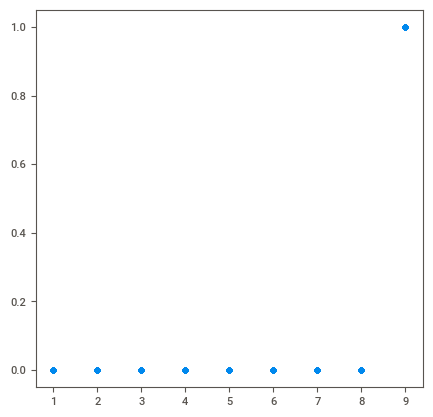

In [89]:
#scatter plot

plt.rcParams['figure.figsize'] = 5,5

plt.scatter(churn['tenure'], churn['active']);

In [90]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport

ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (C:\Users\hanna\anaconda3\lib\site-packages\pandas\core\dtypes\generic.py)

In [92]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(churn)
# prof.to_file(output_file='output.html')

In [93]:
# error - Pandas >= v1.3 renamed the ABCIndexClass to ABCIndex.

In [94]:
# Import Libraries
print('Importing Libraries ... ',end='')
import sweetviz as sv
import pandas as pd
print('Done')

Importing Libraries ... Done


In [95]:
# Analyzing data
report=sv.analyze(churn)

# Generating report
report.show_html('eda_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [96]:
report.show_html(filepath='eda_report.html',
open_browser=True,
layout='vertical',
scale=0.7)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



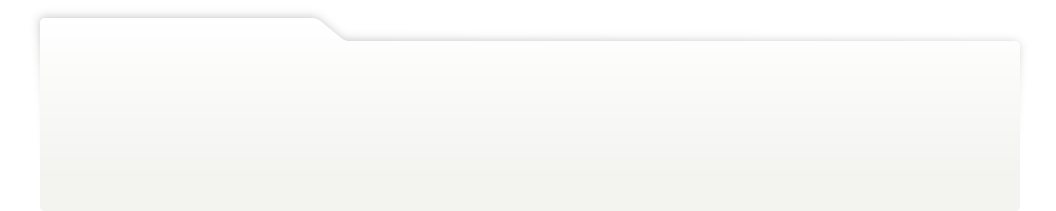
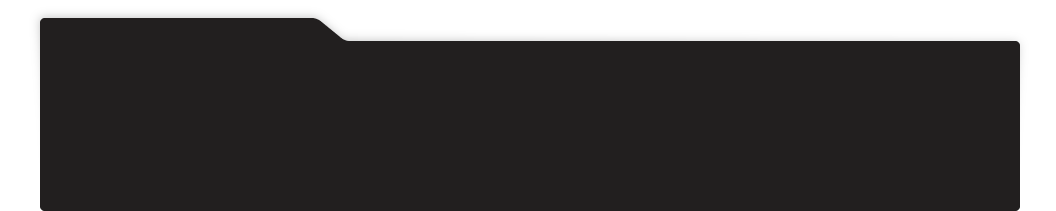
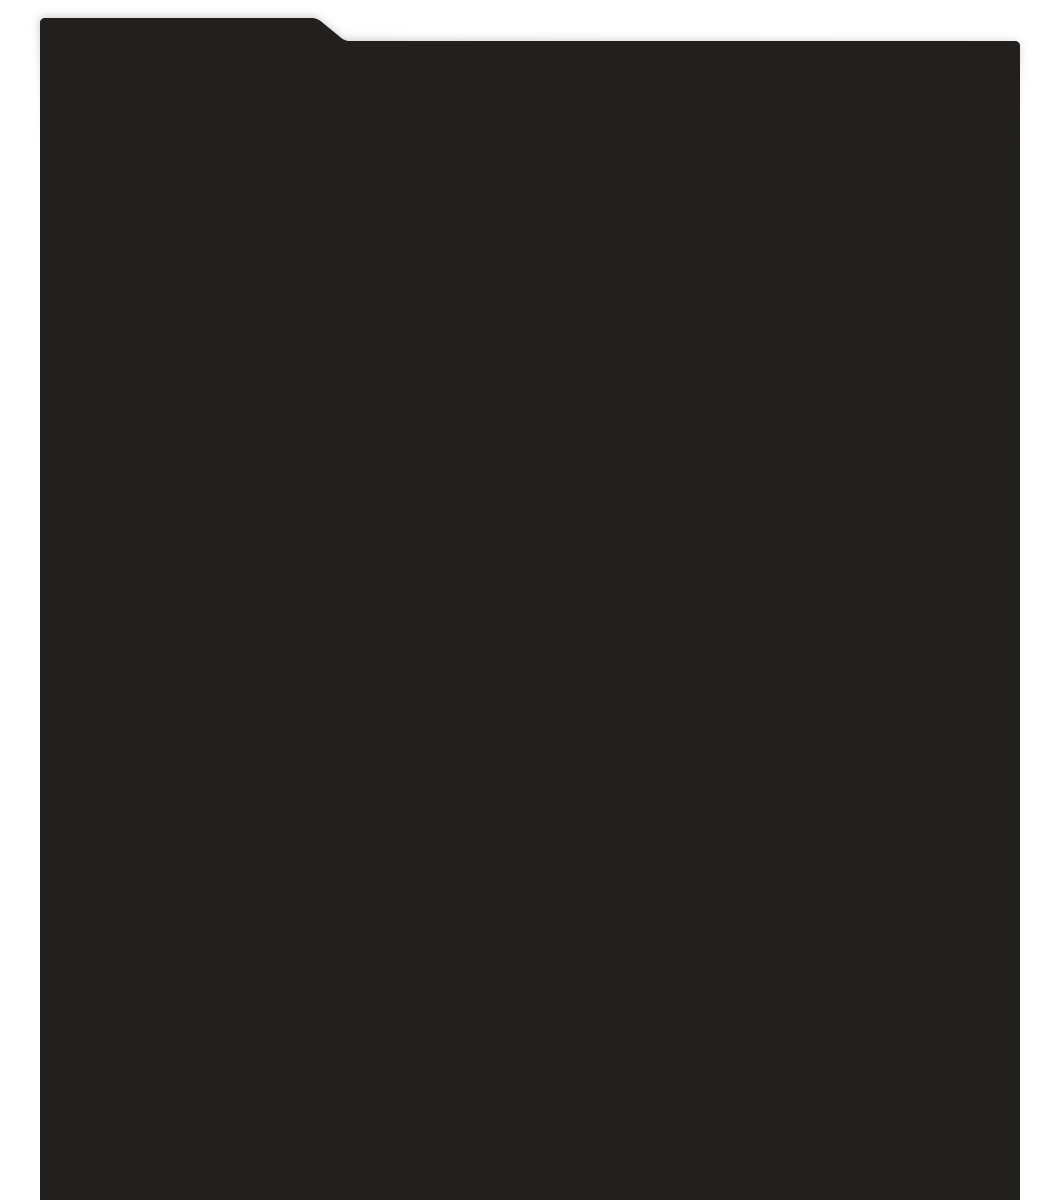
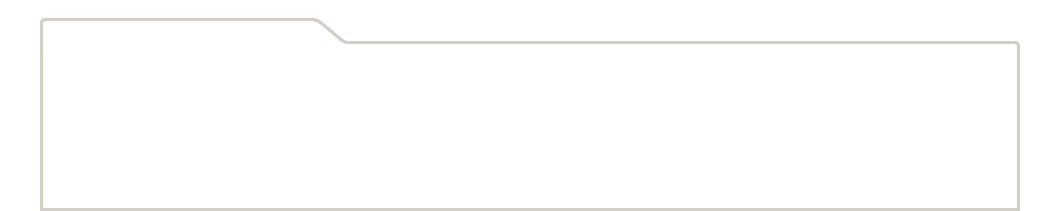
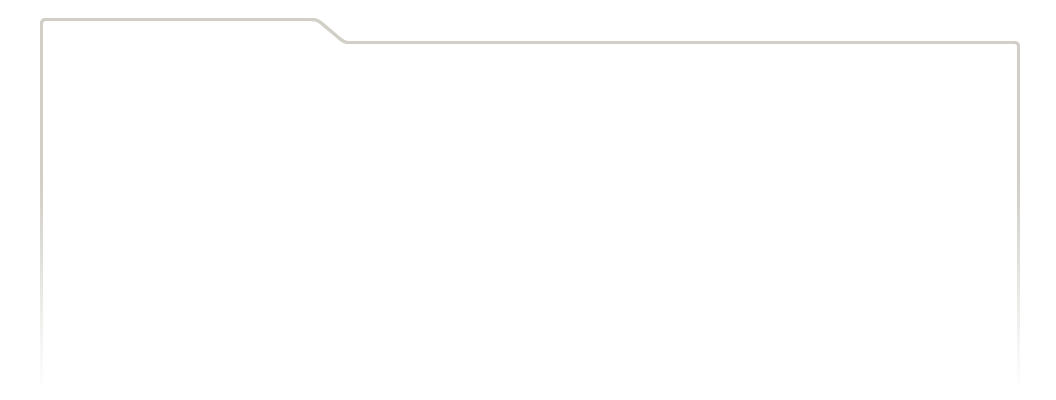
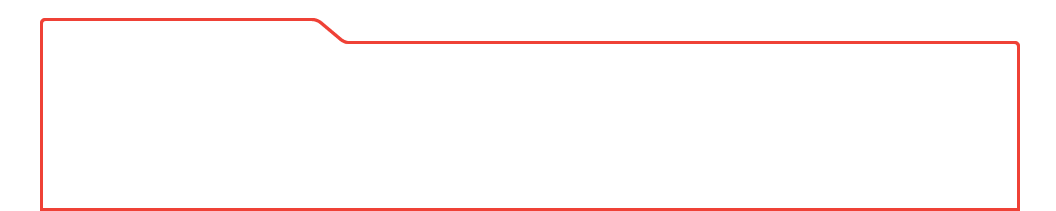
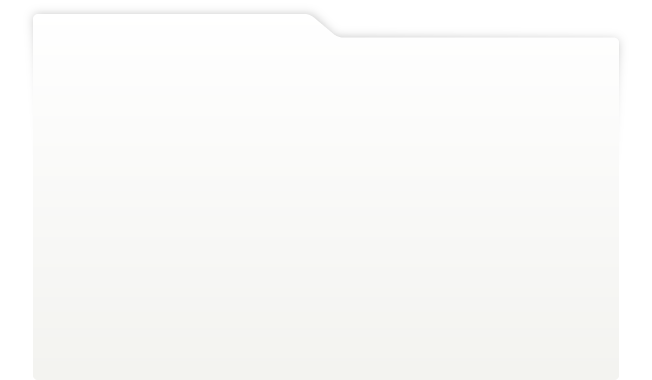
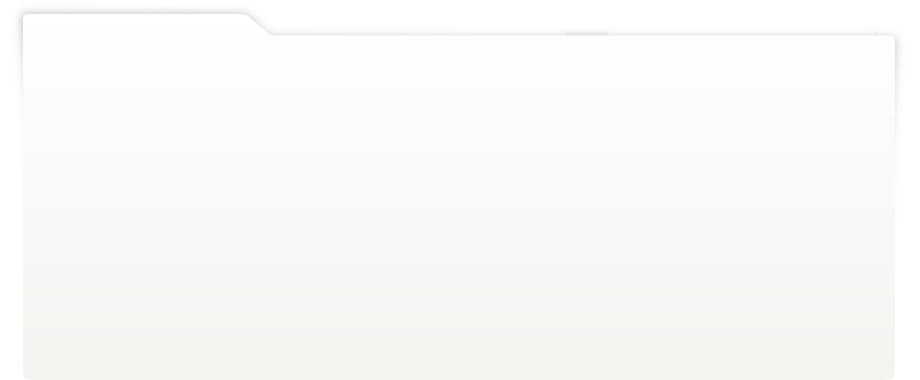
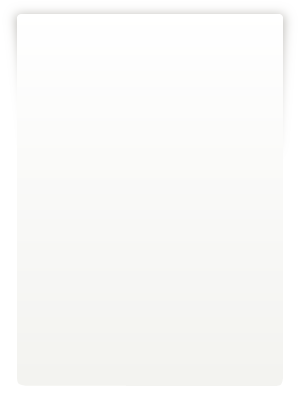
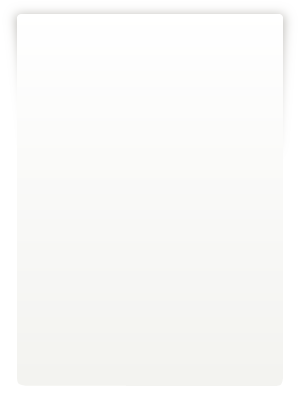
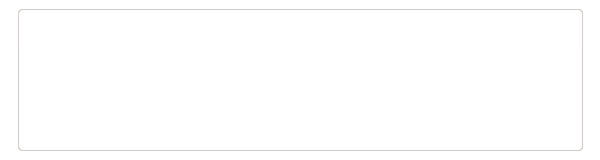
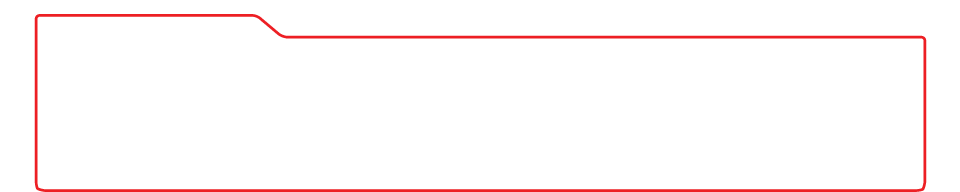
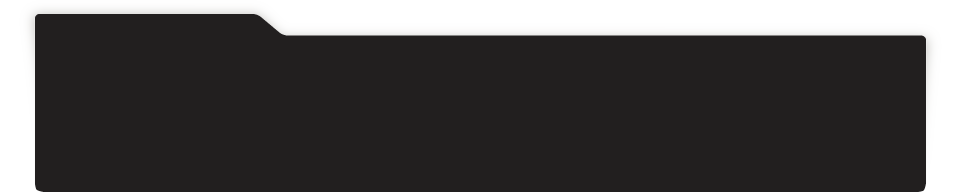
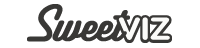
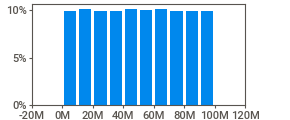
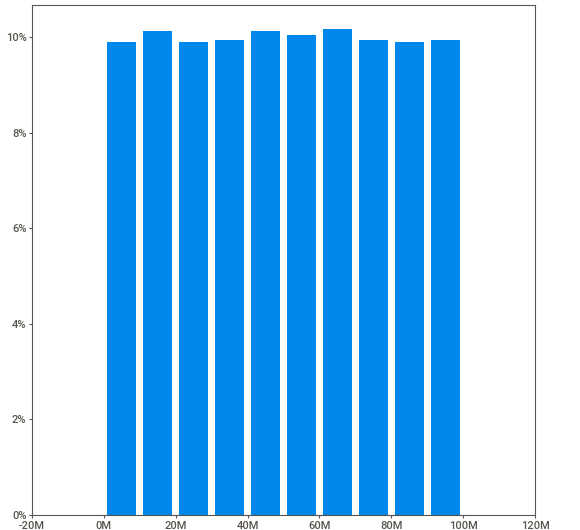
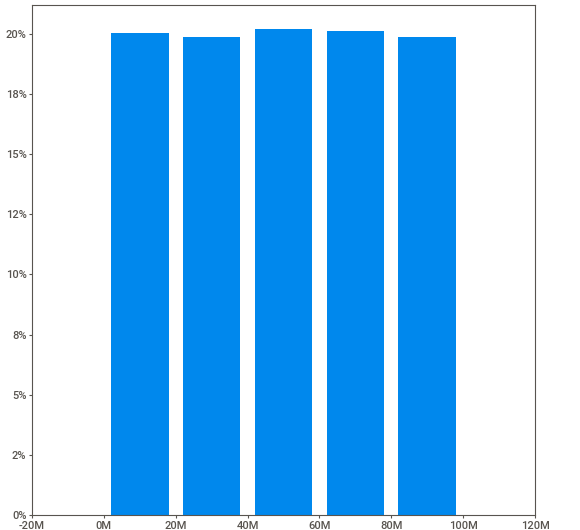
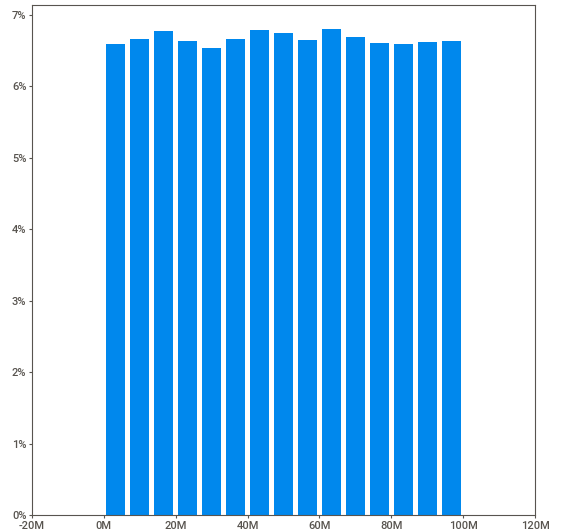
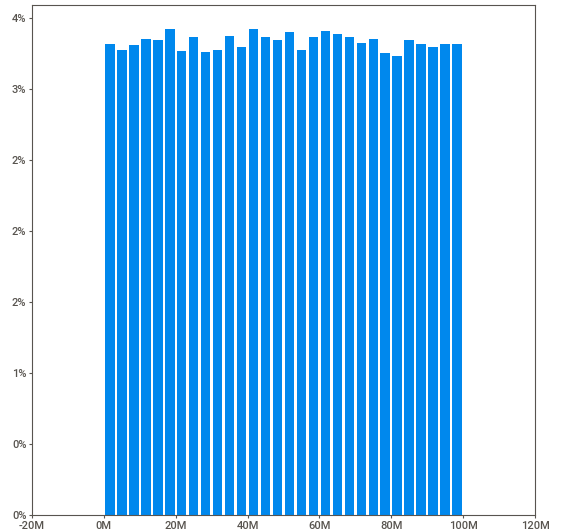
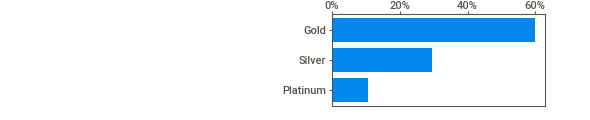
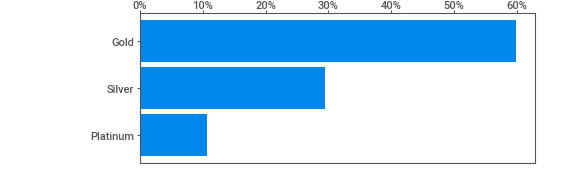
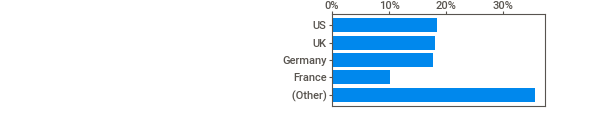
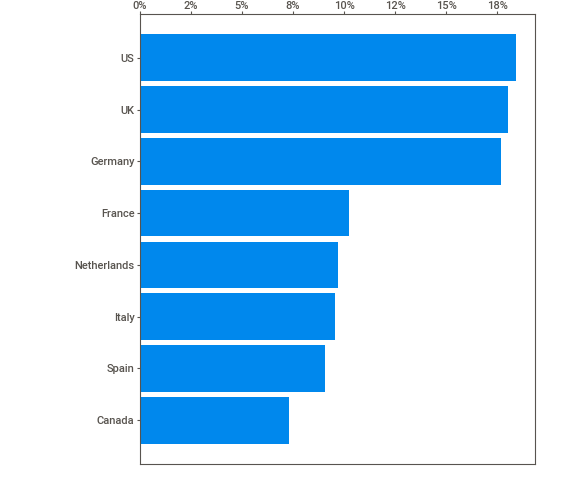
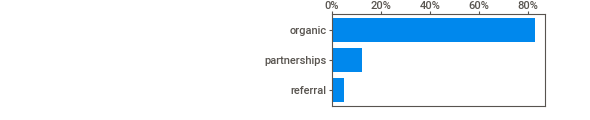
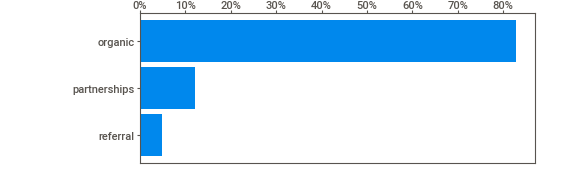
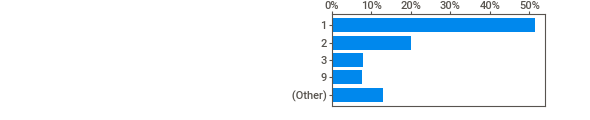
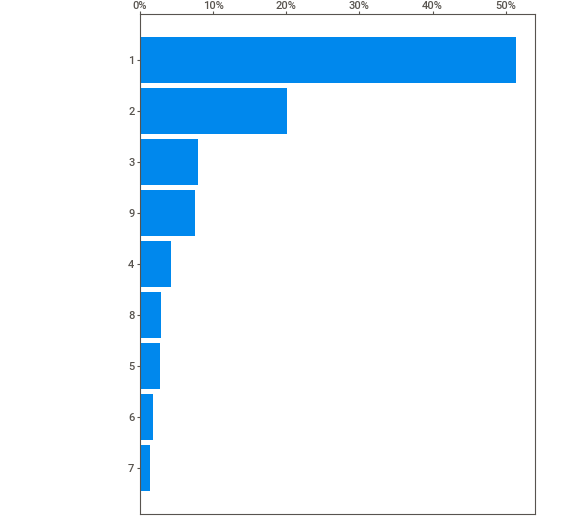
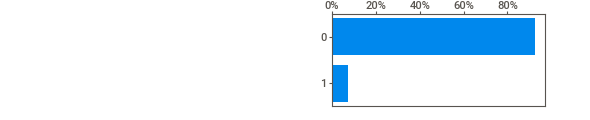
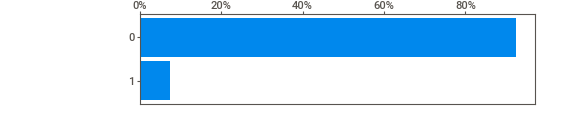
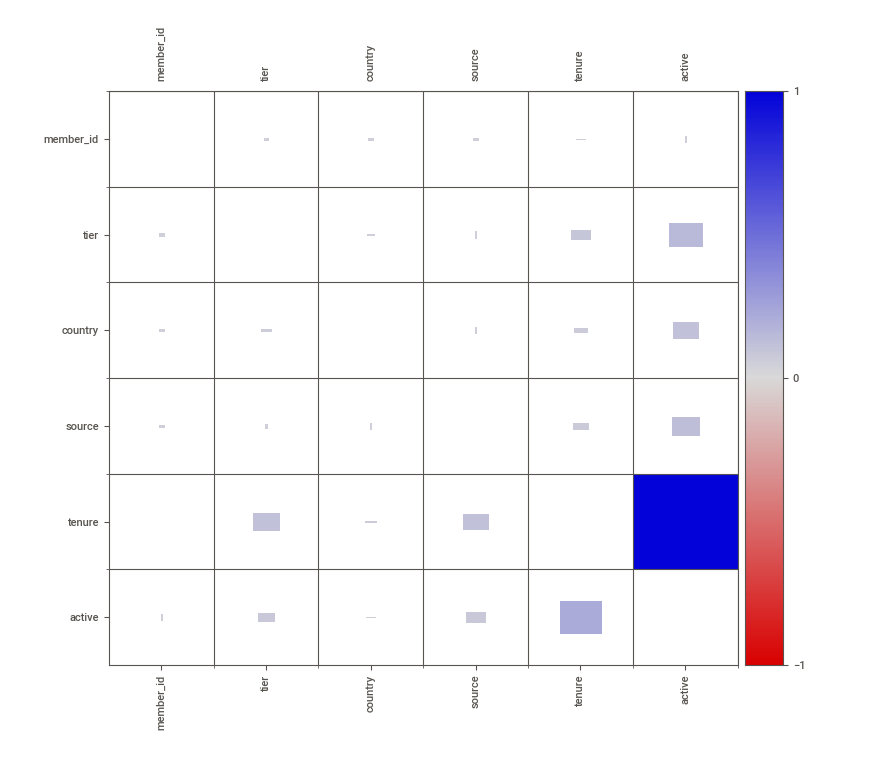
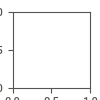

Report 'sweetviz_report.html' was saved to storage.


In [97]:
report.show_notebook(w=None, 
                h=None, 
                scale=None,
                layout='vertical',
                filepath='sweetviz_report.html')

In [98]:
churn.skew().sort_values(ascending=False)

active       3.228226
tenure       1.688505
member_id    0.001505
dtype: float64

In [99]:
churn.head()

,member_id,tier,country,source,tenure,active
0,12428284,Platinum,Germany,referral,6,0
1,39743027,Platinum,France,referral,1,0
2,59559187,Silver,UK,organic,1,0
3,46170183,Silver,UK,organic,4,0
4,14600427,Gold,France,organic,1,0


In [100]:
# Using Replace method to tranform the tier column since it is nominal and using one hot encoding (Dummies) to transform
#source and Country column since it is nominal.

In [101]:
churn['tier'].value_counts(normalize = True)

Gold        0.598715
Silver      0.294885
Platinum    0.106400
Name: tier, dtype: float64

In [102]:
churn_copy = churn.copy()

churn_copy_categorical = churn_copy.select_dtypes(exclude=[np.number])

churn_copy.head()

,member_id,tier,country,source,tenure,active
0,12428284,Platinum,Germany,referral,6,0
1,39743027,Platinum,France,referral,1,0
2,59559187,Silver,UK,organic,1,0
3,46170183,Silver,UK,organic,4,0
4,14600427,Gold,France,organic,1,0


In [103]:
# # Finding Unique Values

In [104]:
print(churn_copy_categorical['tier'].unique())
print(churn_copy_categorical['country'].unique())
print(churn_copy_categorical['source'].unique())


['Platinum' 'Silver' 'Gold']
['Germany' 'France' 'UK' 'Netherlands' 'US' 'Spain' 'Italy' 'Canada']
['referral' 'organic' 'partnerships']


In [105]:
# Conversion with Replace Method (tier as it is ordinal) also called mapping


In [106]:
churn_copy.tier.replace({"Platinum":3,"Silver":1, "Gold":2}, inplace= True) 
churn_copy.head()

,member_id,tier,country,source,tenure,active
0,12428284,3,Germany,referral,6,0
1,39743027,3,France,referral,1,0
2,59559187,1,UK,organic,1,0
3,46170183,1,UK,organic,4,0
4,14600427,2,France,organic,1,0


In [107]:
churn_copy.describe(include=['object', 'bool'])

,country,source
count,99944,99944
unique,8,3
top,US,organic
freq,18425,82836


In [108]:
# Categorical boolean mask
categorical_feature_mask = churn_copy.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = churn_copy.columns[categorical_feature_mask].tolist()

categorical_cols

['country', 'source']

In [109]:
churn_copy.columns

Index(['member_id', 'tier', 'country', 'source', 'tenure', 'active'], dtype='object')

In [110]:
# Create dummy variables for the categorical features
to_dummy = churn_copy.select_dtypes(exclude=[np.number]).columns



churn_copy  = pd.get_dummies(churn_copy, prefix = to_dummy, columns = to_dummy)
churn_copy.head()

,member_id,tier,tenure,active,country_Canada,country_France,country_Germany,country_Italy,country_Netherlands,country_Spain,country_UK,country_US,source_organic,source_partnerships,source_referral
0,12428284,3,6,0,0,0,1,0,0,0,0,0,0,0,1
1,39743027,3,1,0,0,1,0,0,0,0,0,0,0,0,1
2,59559187,1,1,0,0,0,0,0,0,0,1,0,1,0,0
3,46170183,1,4,0,0,0,0,0,0,0,1,0,1,0,0
4,14600427,2,1,0,0,1,0,0,0,0,0,0,1,0,0


In [111]:
churn_copy.shape

(99944, 15)

In [112]:
#pip install category_encoders

In [113]:
#import category_encoders as ce

In [114]:
# from category_encoders import OrdinalEncoder
# mapping = [{'col': 'tier', 'mapping': {"Silver": 1,  "Gold": 2, "Platinum": 3}}]
# OrdinalEncoder(cols=['tier'], mapping=mapping).fit(churn).transform(churn)


In [115]:
# from category_encoders import OneHotEncoder
# OneHotEncoder(cols=['country','source']).fit(churn_copy).transform(churn_copy)


In [116]:
churn_copy.head()

,member_id,tier,tenure,active,country_Canada,country_France,country_Germany,country_Italy,country_Netherlands,country_Spain,country_UK,country_US,source_organic,source_partnerships,source_referral
0,12428284,3,6,0,0,0,1,0,0,0,0,0,0,0,1
1,39743027,3,1,0,0,1,0,0,0,0,0,0,0,0,1
2,59559187,1,1,0,0,0,0,0,0,0,1,0,1,0,0
3,46170183,1,4,0,0,0,0,0,0,0,1,0,1,0,0
4,14600427,2,1,0,0,1,0,0,0,0,0,0,1,0,0


In [117]:
churn_copy.drop('member_id', axis=1, inplace=True) 

In [118]:
churn_copy.head()

,tier,tenure,active,country_Canada,country_France,country_Germany,country_Italy,country_Netherlands,country_Spain,country_UK,country_US,source_organic,source_partnerships,source_referral
0,3,6,0,0,0,1,0,0,0,0,0,0,0,1
1,3,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,1,0,1,0,0
3,1,4,0,0,0,0,0,0,0,1,0,1,0,0
4,2,1,0,0,1,0,0,0,0,0,0,1,0,0


In [119]:
churn_copy.shape

(99944, 14)

In [124]:
#Save to file
churn_copy.to_csv("churn_copyV1.csv")


In [127]:
X = churn_copy.drop('active', axis = 1)
y = churn_copy.active

In [128]:
X.shape

(99944, 13)

In [129]:
y.shape

(99944,)

In [130]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(churn_copy.drop('active', axis = 1),
                                               churn_copy.active,
                                               test_size = .2,
                                               random_state=12)

[14:05:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


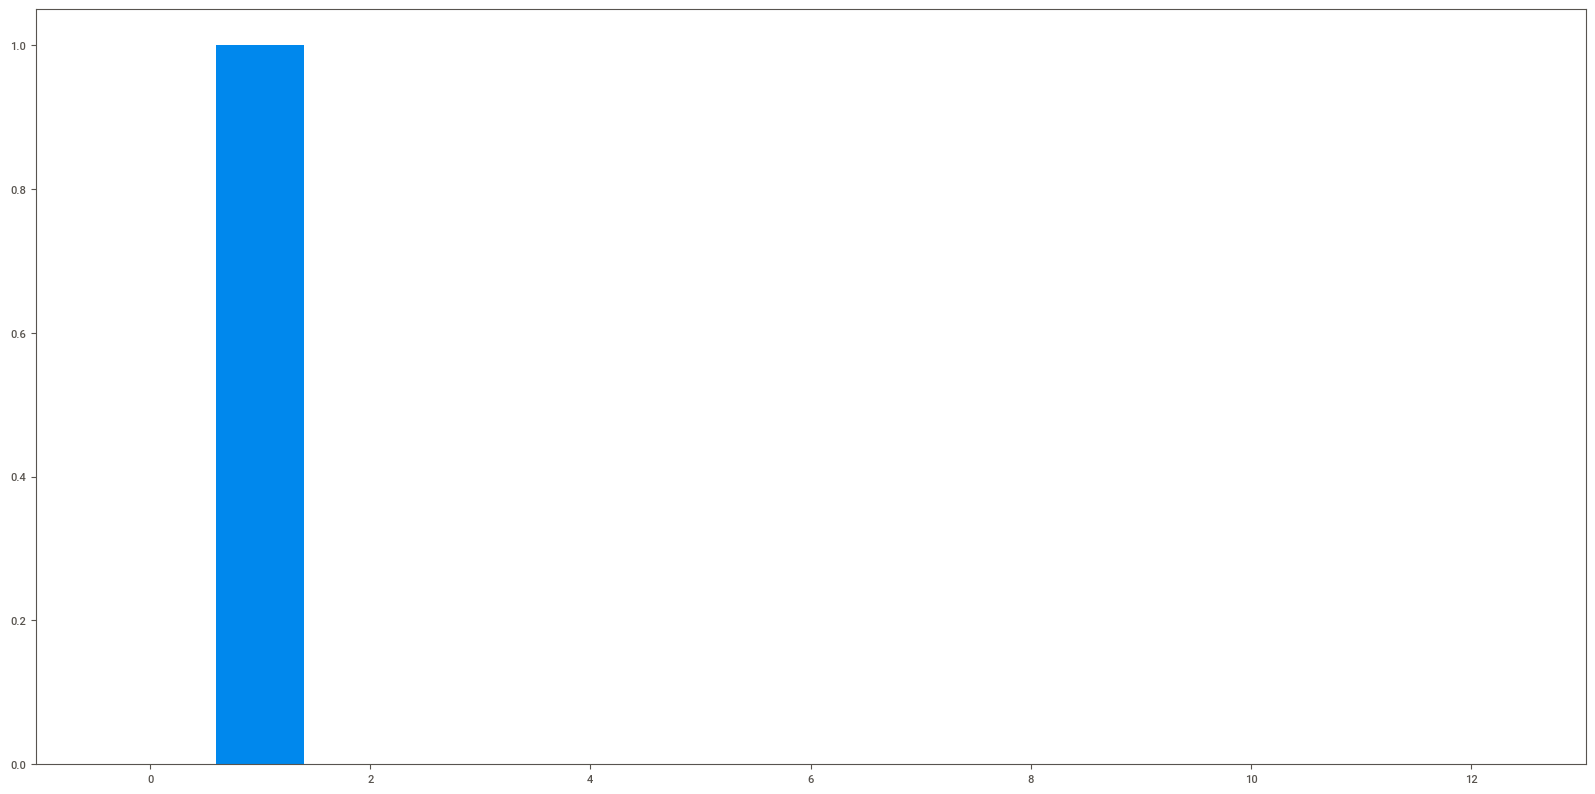

In [131]:
from xgboost import XGBClassifier
from matplotlib import pyplot

plt.figure(figsize=(20,10))

# fit model no training data
model = XGBClassifier()
model.fit(training_features, training_target)

# feature importance
#print(model.feature_importances_)

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [132]:
feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(135, 'Importance Coef')

,Importance Coef,Features
1,1.0,tenure
0,0.0,tier
2,0.0,country_Canada
3,0.0,country_France
4,0.0,country_Germany
5,0.0,country_Italy
6,0.0,country_Netherlands
7,0.0,country_Spain
8,0.0,country_UK
9,0.0,country_US


In [133]:
# Disply all Columns
pd.options.display.max_columns=70

# Calculate Correlation
corr_matrix = churn_copy.corr()  # corr(autinsurance)
corr_matrix


,tier,tenure,active,country_Canada,country_France,country_Germany,country_Italy,country_Netherlands,country_Spain,country_UK,country_US,source_organic,source_partnerships,source_referral
tier,1.000000,-0.331882,-0.230692,-0.123554,0.016979,0.054797,0.002980,-0.053334,0.005213,0.026543,0.023928,-0.001520,-0.001136,0.004371
tenure,-0.331882,1.000000,0.746122,0.152287,-0.069810,-0.013763,-0.065162,0.104335,-0.067797,-0.007995,-0.006195,-0.269300,0.143449,0.252092
active,-0.230692,0.746122,1.000000,0.155484,-0.046149,-0.032256,-0.045056,0.120741,-0.048499,-0.028140,-0.030687,-0.211190,0.097899,0.219808
country_Canada,-0.123554,0.152287,0.155484,1.000000,-0.094766,-0.130106,-0.091076,-0.091946,-0.088518,-0.131641,-0.133384,-0.000778,0.000324,0.000865
country_France,0.016979,-0.069810,-0.046149,-0.094766,1.000000,-0.156638,-0.109649,-0.110695,-0.106569,-0.158485,-0.160583,-0.000790,-0.002255,0.004793
country_Germany,0.054797,-0.013763,-0.032256,-0.130106,-0.156638,1.000000,-0.150539,-0.151976,-0.146310,-0.217587,-0.220468,0.001318,0.000539,-0.003113
country_Italy,0.002980,-0.065162,-0.045056,-0.091076,-0.109649,-0.150539,1.000000,-0.106385,-0.102419,-0.152314,-0.154331,-0.003893,0.003948,0.000805
country_Netherlands,-0.053334,0.104335,0.120741,-0.091946,-0.110695,-0.151976,-0.106385,1.000000,-0.103397,-0.153768,-0.155804,0.000557,-0.000435,-0.000313
country_Spain,0.005213,-0.067797,-0.048499,-0.088518,-0.106569,-0.146310,-0.102419,-0.103397,1.000000,-0.148036,-0.149996,0.004332,-0.002287,-0.004087
country_UK,0.026543,-0.007995,-0.028140,-0.131641,-0.158485,-0.217587,-0.152314,-0.153768,-0.148036,1.000000,-0.223068,0.000885,-0.001133,0.000174


<AxesSubplot:>

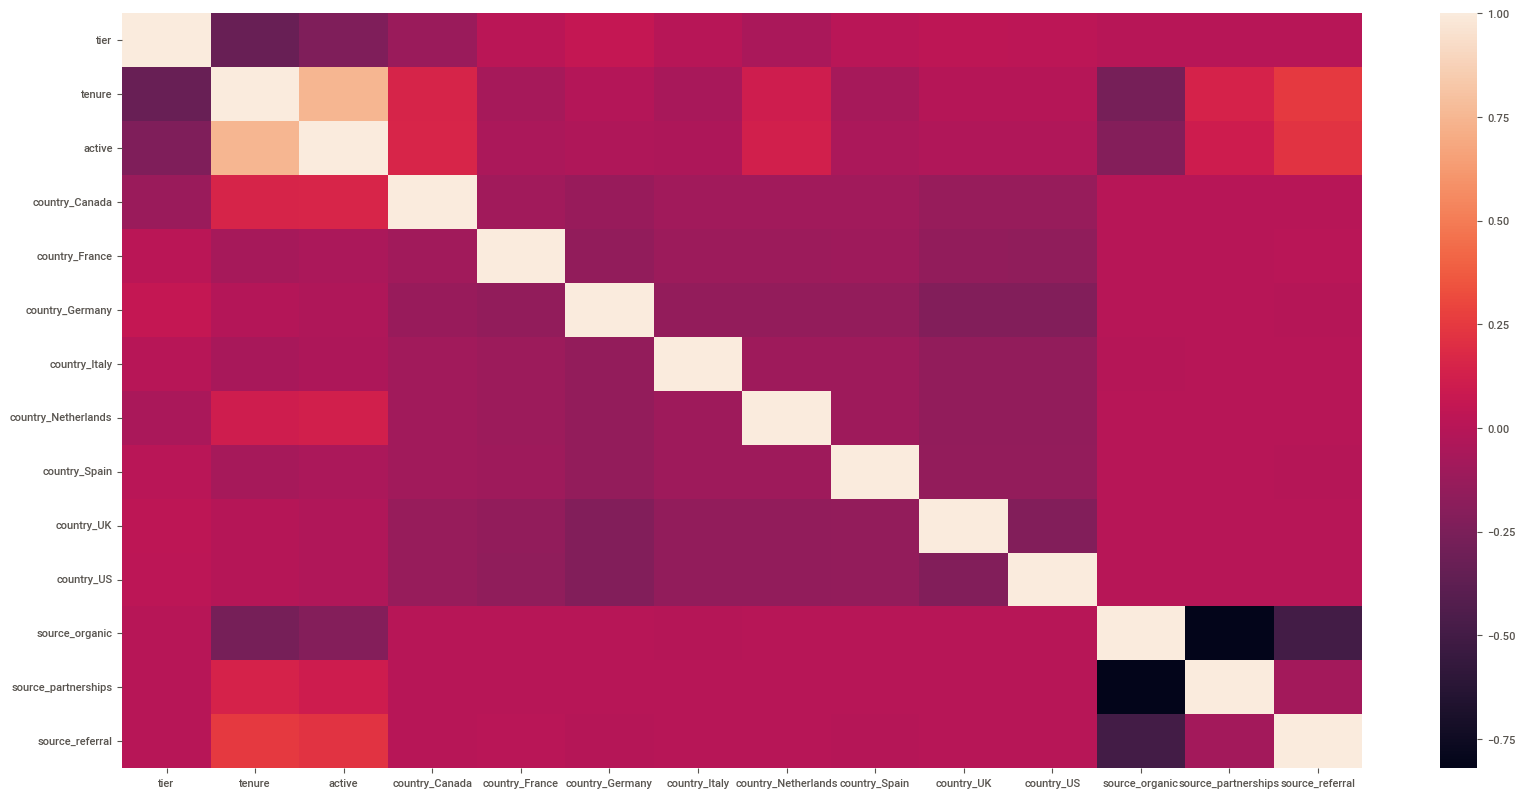

In [134]:
#Correlation heatmap of the numberic variables
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(churn_copy.corr())

<AxesSubplot:>

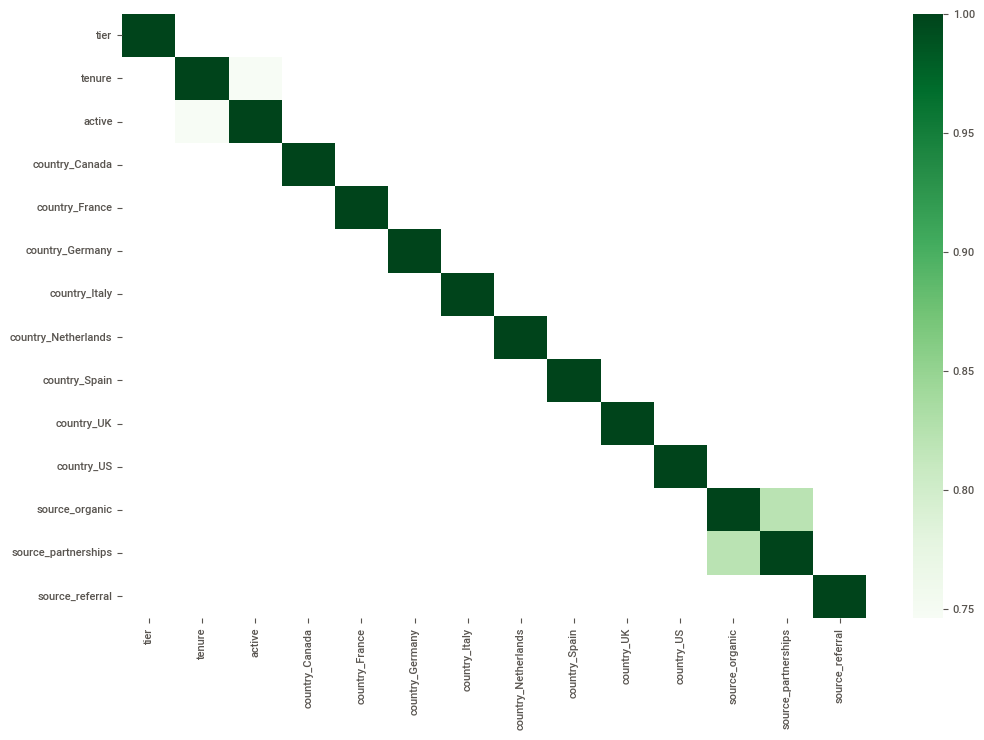

In [135]:
corr = corr_matrix.abs()

kot = corr[corr>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [136]:
churn_copy['active'].value_counts(normalize=True)

0    0.925038
1    0.074962
Name: active, dtype: float64

In [137]:
test_features.shape

(19989, 13)

In [138]:
training_target.shape

(79955,)

In [ ]:
# Building DT

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
DecisionTreeModel = DecisionTreeClassifier(criterion='entropy', random_state=45  , max_depth=4)

#DecisionTreeModel

In [141]:
%%time
DecisionTreeModel.fit(training_features, training_target)  # Training input and its Target variables

Wall time: 1.12 s


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=45)

In [142]:
DT_Pred = DecisionTreeModel.predict(test_features)  

In [143]:
DT_Pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [144]:
test_target

89026    1
35025    0
35745    1
72836    0
12040    0
        ..
86289    0
62385    0
79843    0
44484    0
15909    0
Name: active, Length: 19989, dtype: int64

In [145]:
# Confusion Matrix
#from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [146]:
# Confusion Matrix
CMTD = confusion_matrix(test_target,DT_Pred) # Compare the predicted target varaible to the orginal target variable
CMTD

array([[18487,     0],
       [    0,  1502]], dtype=int64)

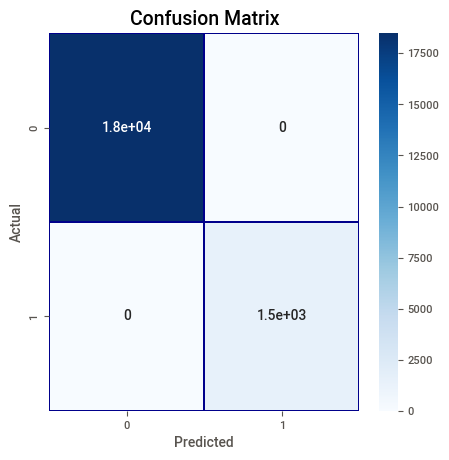

In [148]:
target = 'active'
CMTD = pd.crosstab(test_target,DT_Pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(CMTD, 
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [149]:
# Accuracy Score
ADT= accuracy_score(test_target, DT_Pred)

print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))
# print()


 Decision Tree Prediction Accuracy : 100.00%


In [150]:
# Install required dependancy
!pip install six

In [153]:
#IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [159]:
#from PIL import Image

In [160]:
# # plotting tree with max_depth=3
# dot_data = StringIO()  

# export_graphviz(DecisionTreeModel, out_file=dot_data, filled=True, rounded=True,
#                 feature_names=X.columns, 
#                 class_names=['active', "not active"])

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
Source:vitalflux.com


In [ ]:
# Scaling and applying SMOTE

In [161]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

training_features = sc.fit_transform(training_features)

test_features = sc.transform(test_features)
training_features

array([[ 0.3109903 , -0.64119058, -0.27990253, ...,  0.4552078 ,
        -0.3732304 , -0.22790916],
       [ 0.3109903 , -0.23355417, -0.27990253, ...,  0.4552078 ,
        -0.3732304 , -0.22790916],
       [ 0.3109903 ,  0.98935504, -0.27990253, ...,  0.4552078 ,
        -0.3732304 , -0.22790916],
       ...,
       [ 0.3109903 , -0.64119058, -0.27990253, ...,  0.4552078 ,
        -0.3732304 , -0.22790916],
       [-1.34030667,  2.61990066, -0.27990253, ...,  0.4552078 ,
        -0.3732304 , -0.22790916],
       [-1.34030667, -0.64119058, -0.27990253, ...,  0.4552078 ,
        -0.3732304 , -0.22790916]])

In [162]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

NBModel = GaussianNB()

NBModel.fit(training_features, training_target)

GaussianNB()

In [163]:
%%time

# Predicting the Test set results
NB_pred = NBModel.predict(test_features)

Wall time: 7.61 ms


In [164]:
# Making the Confusion Matrix
CMNB= confusion_matrix(test_target, NB_pred)
CMNB

array([[18487,     0],
       [    0,  1502]], dtype=int64)

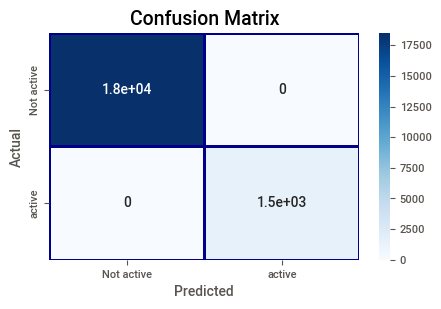

In [165]:
target = 'active'
CMTD = pd.crosstab(test_target,NB_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,3))
sns.heatmap(CMTD, 
            xticklabels=['Not active', 'active'],
            yticklabels=['Not active', 'active'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

<AxesSubplot:>

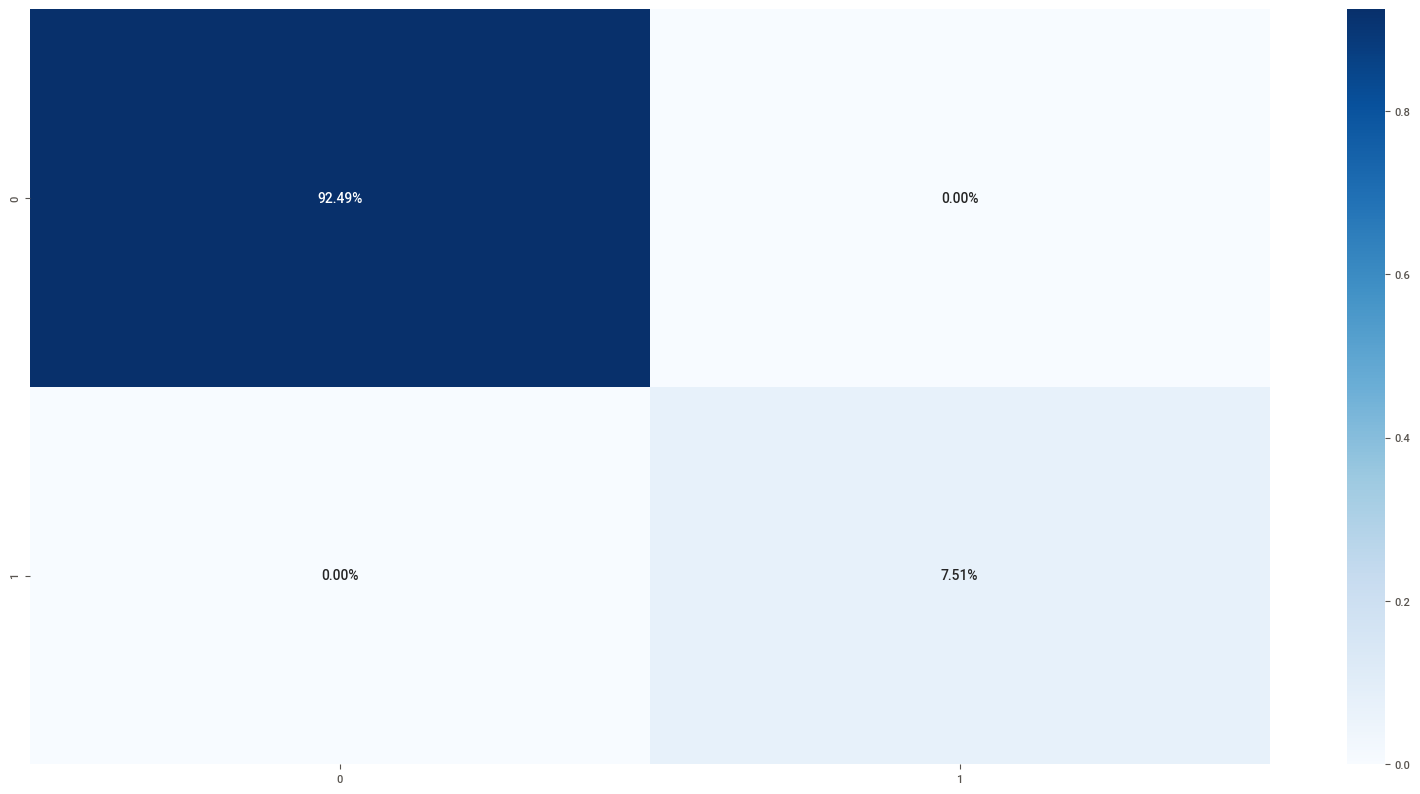

In [166]:
sns.heatmap(CMNB/np.sum(CMNB), annot=True, 
            fmt='.2%', cmap='Blues')

In [167]:
# Accuracy Score
ACNB= accuracy_score(test_target, NB_pred)

print(" NB Prediction Accuracy : {:.2f}%".format(ACNB * 100))
# print()

 NB Prediction Accuracy : 100.00%


In [168]:
# Accuracy Score
print(' Random Prediction on frequency    : {:5.3f}'.format(score* 100))
print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))
print(" Naive Byes Prediction Accuracy    : {:.2f}%".format(ACNB * 100))

NameError: name 'score' is not defined